<a href="https://colab.research.google.com/github/it5joys135/ML-Projects/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
data = files.upload()

Saving Ames_Housing_Data.csv to Ames_Housing_Data.csv
Saving Ames_Housing_Feature_Description.txt to Ames_Housing_Feature_Description.txt


In [ ]:
df = pd.read_csv('Ames_Housing_Data.csv')
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
numeric_df = df.select_dtypes(include=np.number)
numeric_df.corr()['SalePrice'].sort_values()

,SalePrice
PID,-0.246521
Enclosed Porch,-0.128787
Kitchen AbvGr,-0.119814
Overall Cond,-0.101697
MS SubClass,-0.085092
Low Qual Fin SF,-0.037660
Bsmt Half Bath,-0.035835
Yr Sold,-0.030569
Misc Val,-0.015691
BsmtFin SF 2,0.005891


<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

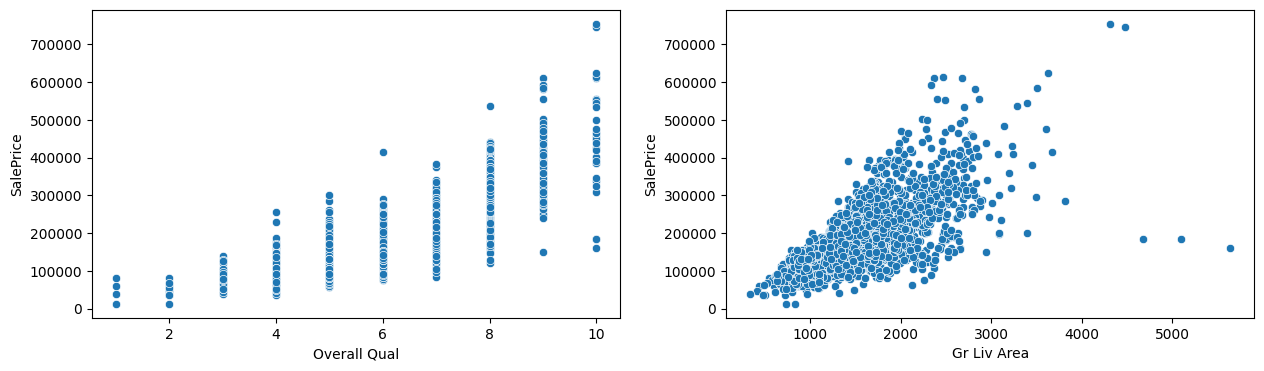

In [ ]:
fig, axes = plt.subplots(figsize=(15, 4), nrows=1, ncols=2)
sns.scatterplot(x='Overall Qual', y='SalePrice', data=df, ax=axes[0])
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df, ax=axes[1])

In [ ]:
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [ ]:
drop_ind = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index

In [ ]:
df = df.drop(drop_ind, axis=0)

In [ ]:
with open('Ames_Housing_Feature_Description.txt', 'r') as f:
  print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2927 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual     29

In [ ]:
df = df.drop('PID', axis=1)

In [ ]:
100 * df.isnull().sum() / len(df)

,0
MS SubClass,0.00000
MS Zoning,0.00000
Lot Frontage,16.74069
Lot Area,0.00000
Street,0.00000
...,...
Mo Sold,0.00000
Yr Sold,0.00000
Sale Type,0.00000
Sale Condition,0.00000


In [ ]:
def percent_missing(df):
  percent_nan = 100 * df.isnull().sum() / len(df)
  percent_nan = percent_nan[percent_nan > 0].sort_values()

  return percent_nan

In [ ]:
percent_nan = percent_missing(df)
percent_nan

,0
Electrical,0.034165
Garage Cars,0.034165
BsmtFin SF 1,0.034165
Garage Area,0.034165
BsmtFin SF 2,0.034165
Bsmt Unf SF,0.034165
Total Bsmt SF,0.034165
Bsmt Half Bath,0.068329
Bsmt Full Bath,0.068329
Mas Vnr Area,0.785787


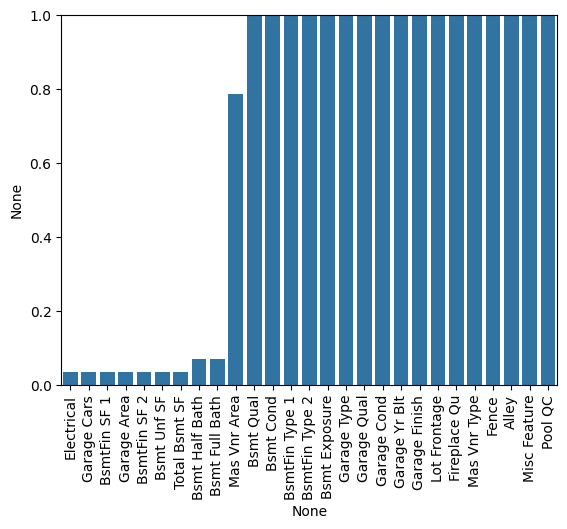

In [ ]:
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.ylim(0,1)
plt.xticks(rotation=90);

In [ ]:
percent_nan[percent_nan < 1]

,0
Electrical,0.034165
Garage Cars,0.034165
BsmtFin SF 1,0.034165
Garage Area,0.034165
BsmtFin SF 2,0.034165
Bsmt Unf SF,0.034165
Total Bsmt SF,0.034165
Bsmt Half Bath,0.068329
Bsmt Full Bath,0.068329
Mas Vnr Area,0.785787


In [ ]:
100/len(df)

0.0341646737273659

In [ ]:
df[df['Electrical'].isnull()]['Garage Area']

,Garage Area
1577,400.0


In [ ]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [ ]:
df = df.dropna(axis=0, subset=['Electrical', 'Garage Cars'])

In [ ]:
percent_nan = percent_missing(df)
percent_nan[percent_nan < 1]

,0
Bsmt Unf SF,0.034188
Total Bsmt SF,0.034188
BsmtFin SF 2,0.034188
BsmtFin SF 1,0.034188
Bsmt Full Bath,0.068376
Bsmt Half Bath,0.068376
Mas Vnr Area,0.786325


In [ ]:
# BSMT numeric col
bsmt_num_col = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_col] = df[bsmt_num_col].fillna(0)

# BSMT string col
bsmt_str_col = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_col] = df[bsmt_str_col].fillna('None')

In [ ]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [ ]:
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')

In [ ]:
percent_nan = percent_missing(df)
percent_nan[percent_nan < 1]

,0


In [ ]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [ ]:
df = df.drop(['Pool QC', 'Misc Feature', 'Alley', 'Fence'], axis=1)

In [ ]:
df['Fireplace Qu'].value_counts()

,count
Fireplace Qu,
Gd,741
TA,600
Fa,75
Po,46
Ex,43


In [ ]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

Neighbourhood: Physical locations with Ames city limits.

LotFrontage: Linear feet of street connected to property

<Axes: xlabel='Lot Frontage', ylabel='Neighborhood'>

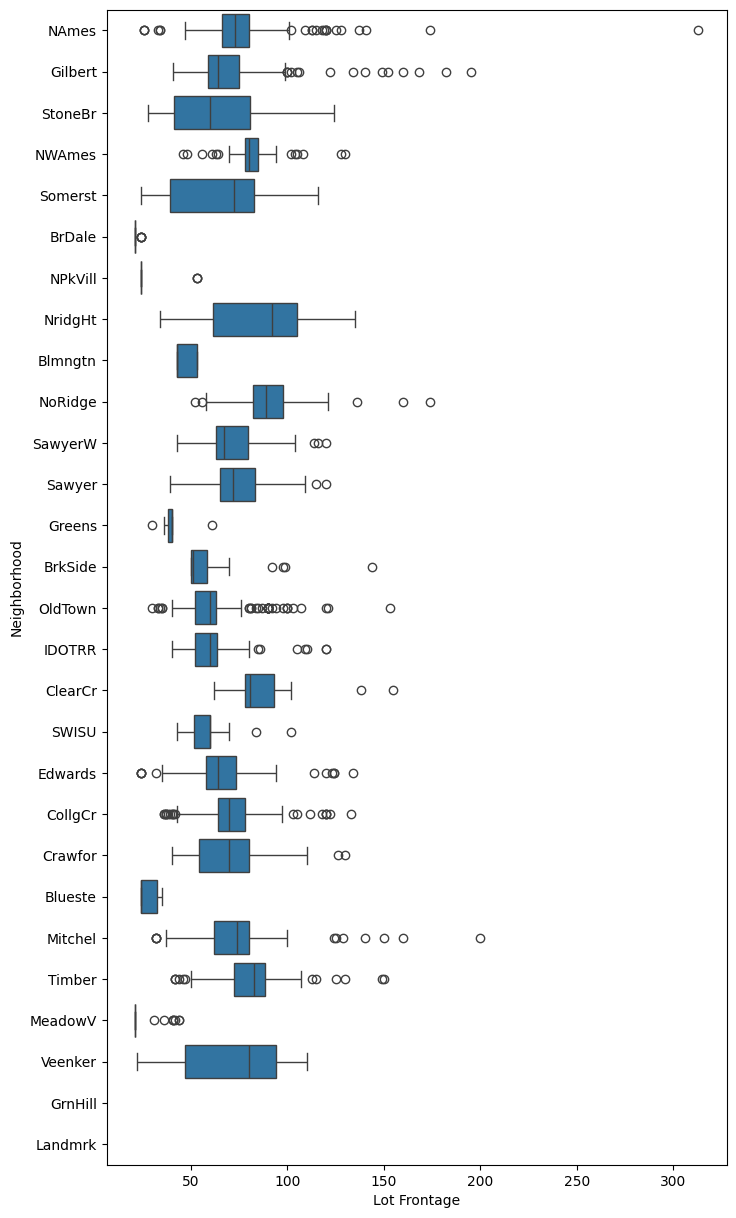

In [ ]:
plt.figure(figsize =(8, 15))
sns.boxplot(y='Neighborhood', x='Lot Frontage', data=df, orient='h')


In [ ]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

,Lot Frontage
Neighborhood,
Blmngtn,46.900000
Blueste,27.300000
BrDale,21.500000
BrkSide,55.789474
ClearCr,88.150000
CollgCr,71.336364
Crawfor,69.951807
Edwards,64.794286
Gilbert,74.207207


In [ ]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))

In [ ]:
df.isnull().sum()

,0
MS SubClass,0
MS Zoning,0
Lot Frontage,3
Lot Area,0
Street,0
...,...
Mo Sold,0
Yr Sold,0
Sale Type,0
Sale Condition,0


In [ ]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df['MS SubClass'] = df['MS SubClass'].apply(str)

In [ ]:
object_df = df.select_dtypes(include='object')
numeric_df = df.select_dtypes(exclude='object')

In [ ]:
df_object_dummies = pd.get_dummies(object_df, drop_first=True)
df_object_dummies.head()

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
final_df = pd.concat([numeric_df, df_object_dummies], axis=1)
final_df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,False,False,False,False,True,False,False,False,True,False
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,False,False,False,False,True,False,False,False,True,False
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,False,False,False,False,True,False,False,False,True,False
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,False,False,False,False,True,False,False,False,True,False
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,False,False,False,False,True,False,False,False,True,False
